<a href="https://colab.research.google.com/github/DayanaMendess/Proyecto_Final_EDA_11/blob/main/ProyectoFinal11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PASO 1. Importar librerías ⏰

In [135]:
# PASO 1: Librerías (plantilla)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)



PASO 2. Importar datos ⏰

In [138]:
# Cargar el dataset del Grupo 11 (Adult Income)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

datos = pd.read_csv(
    url, header=None, names=cols, na_values=" ?", skipinitialspace=True
)

# Copia de trabajo
datos_trabajo = datos.copy()

# Visualizar
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")



   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

PASO 3. Revisar NaN y describir ⏰

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

=== ESTADÍSTICOS DESCRIPTIVOS ===
                age       

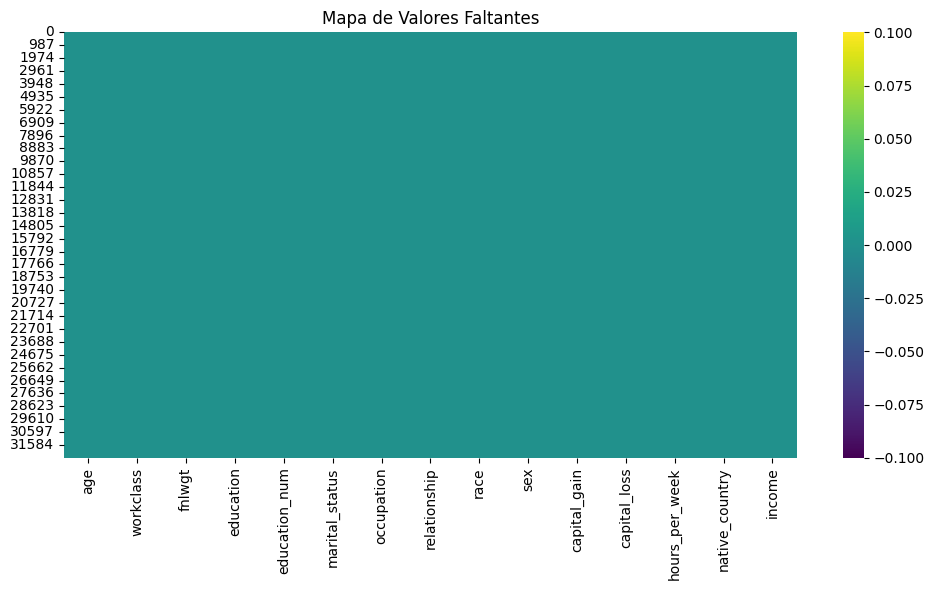

In [139]:
# Información general
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()

# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())

# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())

# Visualización de valores faltantes (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()



PASO 4 · Limpiar datos ⏰

In [140]:
# Eliminar duplicados
datos_trabajo = datos_trabajo.drop_duplicates()

# Rellenar categóricas con moda (workclass/occupation/native_country traen NaN)
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].mode()[0], inplace=True)

# Verificación
print("Valores faltantes después de limpieza:")
print(datos_trabajo.isna().sum())




Valores faltantes después de limpieza:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


PASO 5 · Gráficas ⏰

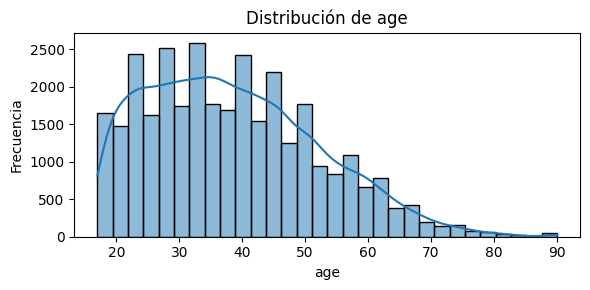

In [134]:

# Gráfica 1: Distribución de variable numérica (age)
plt.figure(figsize=(6, 3))
sns.histplot(datos_trabajo['age'], kde=True, bins=30)
plt.title('Distribución de age')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

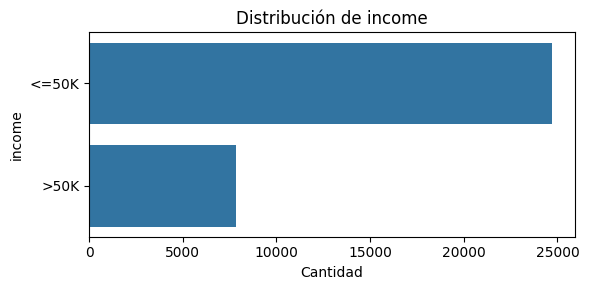

In [133]:

# Gráfica 2: Conteo de variable categórica (income)
plt.figure(figsize=(6, 3))
sns.countplot(
    data=datos_trabajo,
    y='income',
    order=datos_trabajo['income'].value_counts().index
)
plt.title('Distribución de income')
plt.xlabel('Cantidad')
plt.tight_layout()
plt.show()

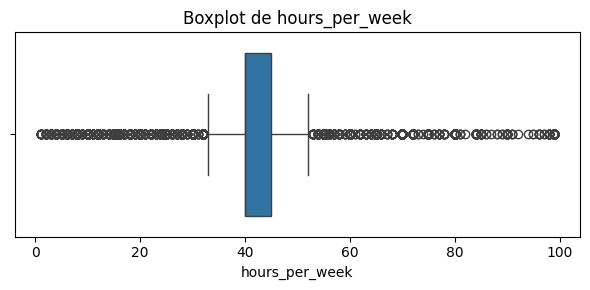

In [132]:
# Gráfica 3: Boxplot para detectar outliers (hours_per_week)
plt.figure(figsize=(6, 3))
sns.boxplot(data=datos_trabajo, x='hours_per_week')
plt.title('Boxplot de hours_per_week')
plt.tight_layout()
plt.show()


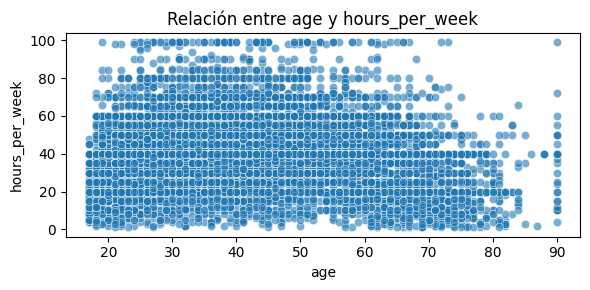

In [131]:
# Gráfica 4: Relación entre dos variables (age vs hours_per_week)
plt.figure(figsize=(6, 3))
sns.scatterplot(
    data=datos_trabajo,
    x='age',
    y='hours_per_week',
    alpha=0.6
)
plt.title('Relación entre age y hours_per_week')
plt.tight_layout()
plt.show()

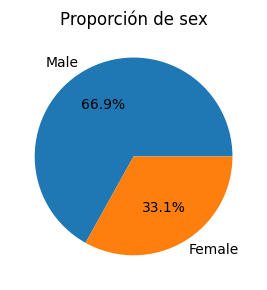

In [130]:
# Gráfica 5: Gráfica de pastel (sex)
plt.figure(figsize=(6, 3))
datos_trabajo['sex'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title('Proporción de sex')
plt.ylabel('')
plt.tight_layout()
plt.show()

PASO 6. Convertir variables a número ⏰

In [141]:
# Objetivo binario: income -> 0/1
datos_trabajo['income'] = datos_trabajo['income'].map({'<=50K':0, '>50K':1})

# Identificar y codificar categóricas con LabelEncoder
columnas_categoricas = datos_trabajo.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(columnas_categoricas)}")

le = LabelEncoder()
for col in columnas_categoricas:
    datos_trabajo[col] = le.fit_transform(datos_trabajo[col])

# Tipos de datos después de la conversión
print("\nTipos de datos después de conversión:")
print(datos_trabajo.dtypes)


Columnas categóricas: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

Tipos de datos después de conversión:
age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object


PASO 7 · Normalización ⏰

In [142]:
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.columns
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])

print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)


=== ANTES DE NORMALIZACIÓN ===
                  count           mean            std      min       25%  \
age             32537.0      38.585549      13.637984     17.0      28.0   
workclass       32537.0       3.868734       1.456445      0.0       4.0   
fnlwgt          32537.0  189780.848511  105556.471009  12285.0  117827.0   
education       32537.0      10.297507       3.870142      0.0       9.0   
education_num   32537.0      10.081815       2.571633      1.0       9.0   
marital_status  32537.0       2.611427       1.506301      0.0       2.0   
occupation      32537.0       6.572856       4.229521      0.0       3.0   
relationship    32537.0       1.446538       1.607064      0.0       0.0   
race            32537.0       3.665827       0.848847      0.0       4.0   
sex             32537.0       0.669238       0.470495      0.0       0.0   
capital_gain    32537.0    1078.443741    7387.957424      0.0       0.0   
capital_loss    32537.0      87.368227     403.101833    

PASO 8 · Correlación (Spearman) + heatmap ⏰

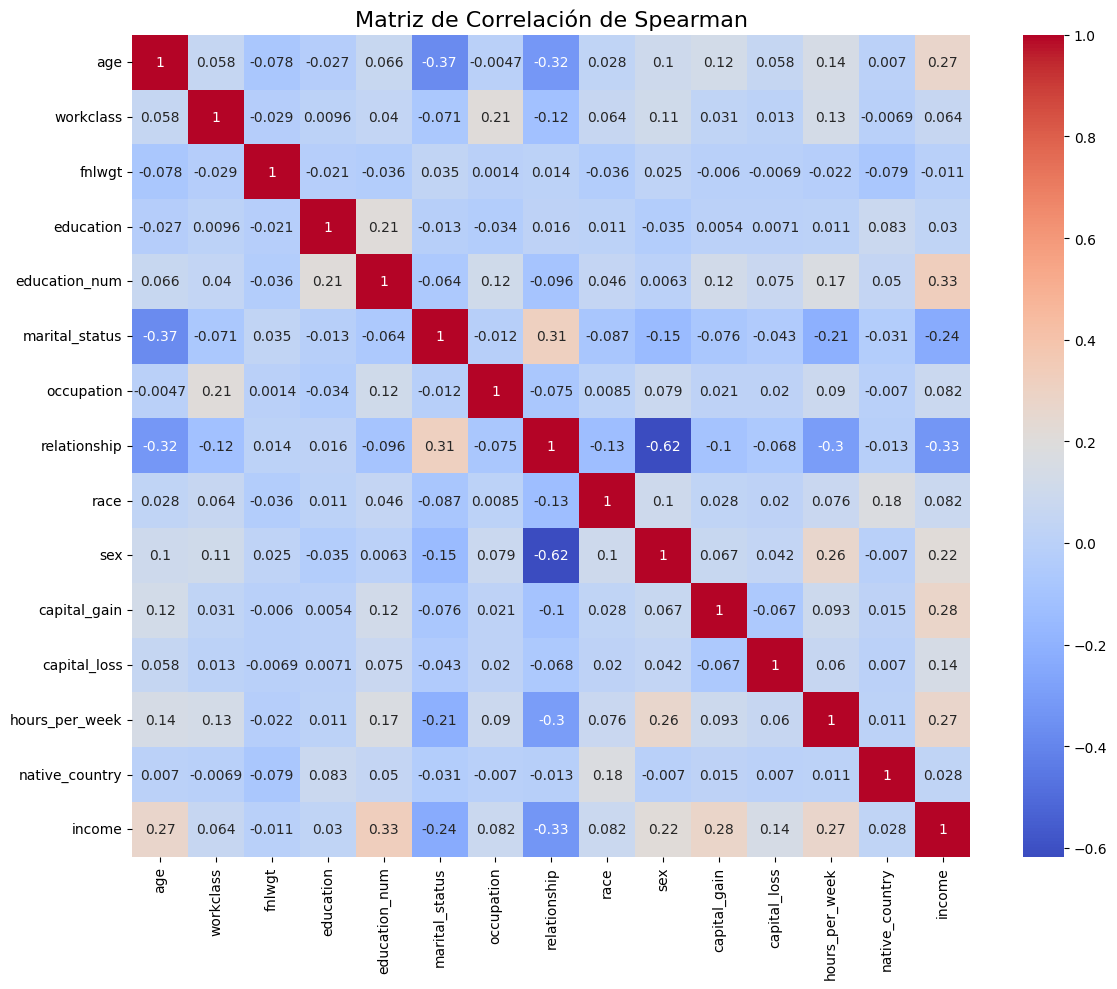


=== CORRELACIONES MÁS FUERTES (|corr|>0.5) ===
relationship <-> sex: -0.618


In [143]:
# Matriz de correlación (Spearman)
correlacion = datos_trabajo.corr(method='spearman')

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout(); plt.show()

# (Opcional de la guía) Correlaciones > 0.5
print("\n=== CORRELACIONES MÁS FUERTES (|corr|>0.5) ===")
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")



PASO 9 · Test de normalidad (Shapiro-Wilk) ⏰

In [144]:
# Función de test de normalidad Shapiro-Wilk
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")
    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL"
                print(f"{col}:")
                print(f"  Estadístico W: {stat:.4f}")
                print(f"  P-valor: {p_value:.4f}")
                print(f"  Conclusión: {resultado}\n")

# Aplicar test
test_normalidad(datos_trabajo)




=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

age:
  Estadístico W: 0.9668
  P-valor: 0.0000
  Conclusión: NO NORMAL

workclass:
  Estadístico W: 0.7482
  P-valor: 0.0000
  Conclusión: NO NORMAL

fnlwgt:
  Estadístico W: 0.9223
  P-valor: 0.0000
  Conclusión: NO NORMAL

education:
  Estadístico W: 0.8735
  P-valor: 0.0000
  Conclusión: NO NORMAL

education_num:
  Estadístico W: 0.9266
  P-valor: 0.0000
  Conclusión: NO NORMAL

marital_status:
  Estadístico W: 0.8641
  P-valor: 0.0000
  Conclusión: NO NORMAL

occupation:
  Estadístico W: 0.9358
  P-valor: 0.0000
  Conclusión: NO NORMAL

relationship:
  Estadístico W: 0.8075
  P-valor: 0.0000
  Conclusión: NO NORMAL

race:
  Estadístico W: 0.4396
  P-valor: 0.0000
  Conclusión: NO NORMAL

sex:
  Estadístico W: 0.5936
  P-valor: 0.0000
  Conclusión: NO NORMAL

capital_gain:
  Estadístico W: 0.1228
  P-valor: 0.0000
  Conclusión: NO NORMAL

capital_loss:
  Estadístico W: 0.2184
  P-valor: 0.0000
  Conclusión: NO NORMAL

hours_

PASO 10 · Pregunta de investigación ⏰

In [145]:
pregunta = ("¿Es posible predecir si el ingreso es >50K (1) o <=50K (0) "
            "con variables demográficas y laborales del dataset Adult?")
print(pregunta)



¿Es posible predecir si el ingreso es >50K (1) o <=50K (0) con variables demográficas y laborales del dataset Adult?


PASO 11 · Ejercicio de predicción (Regresión Lineal) ⏰

=== EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL ===
MSE:  0.1353
RMSE: 0.3679
R²:   0.2710


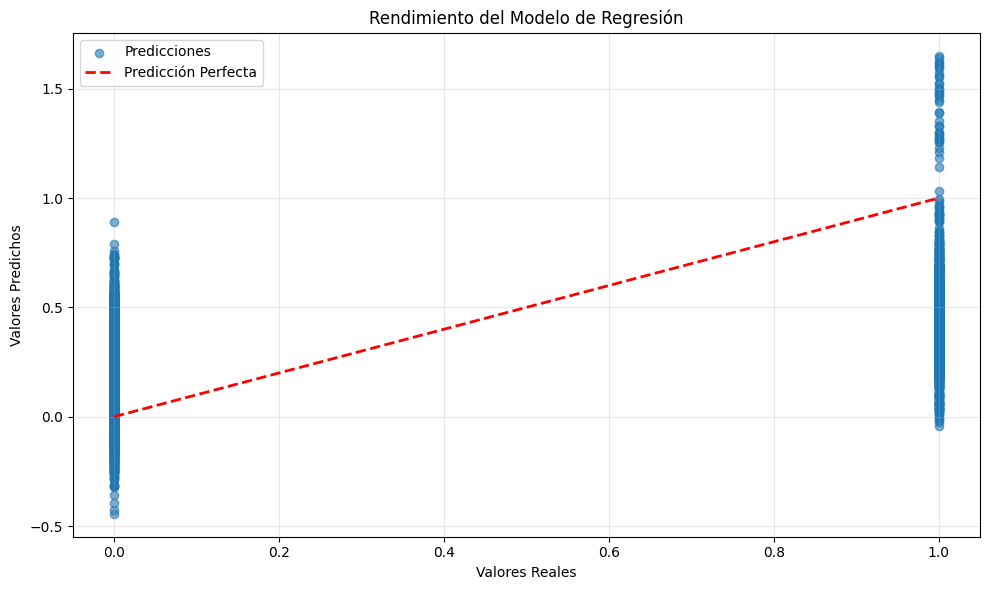

In [146]:
# Definir X (predictoras) e y (objetivo)
X = datos_trabajo.drop('income', axis=1)
y = datos_trabajo['income']

# Train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo de Regresión Lineal (requisito)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL ===")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# Gráfica: Reales vs Predichos (plantilla)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
